In [6]:
import os
import configparser

config = configparser.ConfigParser()

# path to 'config.ini' file in Google
path = 'drive/Shareddrives/CSEN240_Group11/'

if not os.path.isdir(path):
# for local machine
    path = 'configure.ini'
else:
# for Google CoLab
    path += 'configure.ini'

config.read(path)

root_path = config['PATHS']['root']

In [49]:
import numpy as np
from PIL import Image

src = os.path.join(root_path, 'augmented_data/Raw')

heights = [] # heights of images
widths = [] # widths of images
vecs = [] # images as vectors
filenames = [] # image filenames

for filename in os.listdir(src):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        img = Image.open(f'{src}/{filename}')
        img_vec = np.asarray(img)

        h, w, _ = img_vec.shape

        heights.append(h)
        widths.append(w)
        vecs.append(img_vec)
        filenames.append(filename)

n = len(heights)
print('max height', max(heights), 'max width', max(widths))
print('min height', min(heights), 'min width', min(widths))
print('avg height', sum(heights)//n, 'avg width', sum(widths)//n)

X = np.array([[h, w] for h, w in zip(heights, widths)])

max height 702 max width 525
min height 52 min width 52
avg height 287 avg width 220


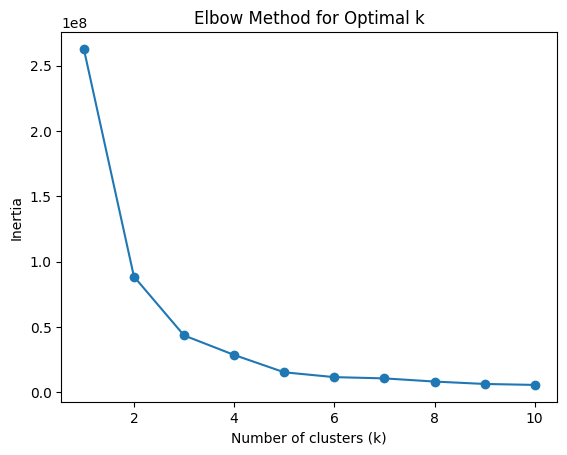

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []
k_values = range(1, 11)  # trying k from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [54]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=42)

# Fit KMeans clustering model to the data
kmeans.fit(X)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Now you have cluster labels for each data point. 
# You can use these labels to sort your data into respective clusters.

# Example: Sorting data points into clusters
clusters = {}
for i in range(k):
    clusters[i] = []

for i, label in enumerate(cluster_labels):
    h, w = X[i]
    if vecs[i].shape != (h, w, 3):
        print('error')
        quit()
    clusters[label].append((X[i], filenames[i]))

# Print the number of points in each cluster
for cluster, points in clusters.items():
    print(f"Cluster {cluster+1}: {len(points)} points")

Cluster 1: 2009 points
Cluster 2: 984 points
Cluster 3: 1558 points
Cluster 4: 2706 points
Cluster 5: 3977 points


In [55]:
for label in clusters.keys():
    heights = []
    widths = []
    for i, (dim, filename) in enumerate(clusters[label]):
        h, w = dim

        heights.append(h)
        widths.append(w)

    n = len(heights)
    print(f'cluster label = {label}')
    print('max height', max(heights), 'max width', max(widths))
    print('min height', min(heights), 'min width', min(widths))
    print('avg height', sum(heights)//n, 'avg width', sum(widths)//n)
    print('')

cluster label = 0
max height 183 max width 139
min height 52 min width 52
avg height 136 avg width 105

cluster label = 1
max height 702 max width 525
min height 484 min width 375
avg height 549 avg width 419

cluster label = 2
max height 470 max width 380
min height 350 min width 278
avg height 417 avg width 321

cluster label = 3
max height 364 max width 297
min height 269 min width 207
avg height 315 avg width 243

cluster label = 4
max height 274 max width 217
min height 179 min width 141
avg height 228 avg width 174



In [81]:
from autocrop import Cropper
import matplotlib.image as mpimg
from collections import defaultdict

def display(arr):
    '''
    shows a subplot for each image file    
    '''
    
    fig, axs = plt.subplots(1, 2)
    for i, img_array in enumerate(arr):
        title = 'Original' if i == 0 else 'Cropped'

        fig.suptitle(title)
        axs[i].imshow(img_array)
        axs[i].tick_params(left = False, right = False , labelleft = False , 
                    labelbottom = False, bottom = False)
        
    plt.show()


label = 0

cropper = Cropper(width=500, height=500)

reject_count = defaultdict(int)

for filename in os.listdir(src):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        img = Image.open(f'{src}/{filename}')
        img_array = np.array(img)
        cropped_array = cropper.crop(f'{src}/{filename}')

        label = filename.split('_')[0]
        arr = [img_array]
        if type(cropped_array) != type(None):
            arr.append(cropped_array)
            reject_count[label] += 1
        else:
            reject_count[label] += 0
        
        reject_count[label + '_total'] += 1

In [82]:
for label, count in reject_count.items():
    print(label, count)

zotaharsh 318
zotaharsh_total 369
zhangyuanzhen 328
zhangyuanzhen_total 328
zuluagagonzalezisabel 369
zuluagagonzalezisabel_total 369
mendonakshay 369
mendonakshay_total 369
oraisisaac 369
oraisisaac_total 369
yashasvi 328
yashasvi_total 328
lishumeng 369
lishumeng_total 369
pereiranerissagodfrey 369
pereiranerissagodfrey_total 369
negiparth 369
negiparth_total 369
lozanoroberto 265
lozanoroberto_total 328
shahmanali 362
shahmanali_total 369
chientingwei 218
chientingwei_total 369
liuhongji 287
liuhongji_total 287
huangjiaoyan 270
huangjiaoyan_total 369
gowdarachandrashekarappasrivarsha 369
gowdarachandrashekarappasrivarsha_total 369
chenziang 253
chenziang_total 328
selinayu 369
selinayu_total 369
somaniachal 369
somaniachal_total 369
amarisian 369
amarisian_total 369
sivarajusairevanth 205
sivarajusairevanth_total 205
wukaiyue 362
wukaiyue_total 369
ravijayanthidhanasekar 363
ravijayanthidhanasekar_total 369
perambuduruvishnu 369
perambuduruvishnu_total 369
vanderlindenilona 328
vand

In [1]:
import sort_data

filename_to_label, filename_to_img, label_to_filenames = sort_data.get_maps()

print(len(label_to_filenames.keys()))

33


In [3]:
import os
import configparser
from PIL import Image

import numpy as np

import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as datasets
from torchvision import transforms


config = configparser.ConfigParser()

# path to 'config.ini' file in Google
path = 'drive/Shareddrives/CSEN240_Group11/'

if not os.path.isdir(path):
# for local machine
    path = 'configure.ini'
else:
# for Google CoLab
    path += 'configure.ini'

config.read(path)

root_path = config['PATHS']['root']
train_path = root_path + config['PATHS']['train']

# load dataset
data_dir = os.path.join(root_path, 'torchvision_dataset')
dataset = datasets.ImageFolder(data_dir, transform=lambda img: np.array(img).astype(float))

def get_mean_std(loader):
    # Compute the mean and standard deviation of all pixels in the dataset
    num_pixels = 0
    mean = 0.0
    std = 0.0
    images: torch.Tensor
    for images, _ in loader:
        batch_size, num_channels, height, width = images.shape
        num_pixels += batch_size * height * width
        mean += images.mean(axis=(0, 2, 3)).sum()
        std += images.std(axis=(0, 2, 3)).sum()

    mean /= num_pixels
    std /= num_pixels

    return mean, std

data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

batch_size = 32
loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
mean, std = get_mean_std(loader)

data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

dataset = datasets.ImageFolder(data_dir, transform=data_transforms)

In [4]:
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(4 * 500 * 500, 128),
    nn.ReLU(),
    nn.Linear(128, 33)
)

In [7]:
from tqdm import tqdm

model = model.double()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    
    inputs: torch.Tensor
    for i, (inputs, labels) in enumerate(tqdm(loader)):
        inputs = inputs.permute(0, 3, 1, 2)

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1} loss: {epoch_loss:.4f}")

100%|██████████| 332/332 [2:23:28<00:00, 25.93s/it]   


Epoch 1 loss: 3.4917


100%|██████████| 332/332 [2:35:44<00:00, 28.15s/it]   


Epoch 2 loss: 3.4893


100%|██████████| 332/332 [3:06:43<00:00, 33.75s/it]   


Epoch 3 loss: 3.4872


100%|██████████| 332/332 [2:48:57<00:00, 30.54s/it]   


Epoch 4 loss: 3.4854


100%|██████████| 332/332 [2:44:08<00:00, 29.66s/it]    


Epoch 5 loss: 3.4840


100%|██████████| 332/332 [3:31:04<00:00, 38.15s/it]    


Epoch 6 loss: 3.4828


100%|██████████| 332/332 [2:01:50<00:00, 22.02s/it]   


Epoch 7 loss: 3.4818


100%|██████████| 332/332 [3:13:39<00:00, 35.00s/it]    


Epoch 8 loss: 3.4810


100%|██████████| 332/332 [2:53:40<00:00, 31.39s/it]    


Epoch 9 loss: 3.4803


100%|██████████| 332/332 [2:29:56<00:00, 27.10s/it]   


Epoch 10 loss: 3.4796


RuntimeError: File nn_classify.pth cannot be opened.

In [9]:
model_dst = os.path.join(root_path, 'models')
os.makedirs(model_dst, exist_ok=True)
torch.save(model, f'{model_dst}/nn.pth')
print('model saved successfully')

model saved successfully


In [10]:
model.eval()

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=1000000, out_features=128, bias=True)
  (8): ReLU()
  (9): Linear(in_features=128, out_features=33, bias=True)
)